# Naive Bayes Classifier

### Ali Pakdel Samadi

#### 810198368

Read csv files.

In [1]:
import pandas as pd
from hazm import *
import string
from collections import Counter
import numpy as np
import math

train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")

train_df['content'] = train_df.fillna({'content':''})
display(train_df)
display(test_df)

,content,label
0,فیلم‌های در حال اکران؛ موزیکال شاد خاله قورباغ...,هنر و سینما
1,پنج فیلمسازی که کوئنتین تارانتینو را عاشق سینم...,هنر و سینما
2,جانی آیو از اپل رفت جانی آیو دیگر نیازی به معر...,علم و تکنولوژی
3,احتمال عدم پشتیبانی iOS ۱۳ از آیفون ۵ اس، SE و...,علم و تکنولوژی
4,دزدان مغازه نماینده ژاپن در اسکار ۲۰۱۹ شد فیلم...,هنر و سینما
...,...,...
5195,امپراطوری اپ (فصل اول/بخش دوم) فصل اول – بخش د...,سلامت و زیبایی
5196,عدم ارتباطات اثربخش و تعارض در محیط کار وجود س...,سلامت و زیبایی
5197,اپل در سال ۲۰۲۰ چهار آیفون معرفی خواهد کرد! طب...,علم و تکنولوژی
5198,مارتینز: بلژیک باید مقابل فرانسه بدون ترس بازی...,سلامت و زیبایی


,content,label
0,با این ۵ صبحانه رژیمی لاغر شوید صبحانه همیشه ب...,سلامت و زیبایی
1,نمایشگر گوشی تاشونده ال‌جی مانند بروشور باز و ...,علم و تکنولوژی
2,چرا برخی سلبریتی‌های هالیوودی از شبکه‌های اجتم...,هنر و سینما
3,گوگل استیدیا؛ آینده‌ی صنعت بازی یا محکوم به شک...,بازی ویدیویی
4,ویژگی جذاب گلکسی Z Flip به زودی به گوشی‌های ان...,علم و تکنولوژی
...,...,...
797,برادران داردن با فیلمی درباره افراطی‎گری به کن...,هنر و سینما
798,Death Stranding پر از میان‌پرده‌های طولانی است...,بازی ویدیویی
799,حالت نیو گیم پلاس به اسپایدرمن اضافه می‌شود چن...,بازی ویدیویی
800,چگونه مثل جف بزوس هک نشویم؛ ۵ توصیه امنیتی برا...,علم و تکنولوژی


Read stop words file and store them in a set.

In [2]:
with open('stop_words.txt') as f:
    lines = [line.rstrip() for line in f]
stop_words = set(lines)

# First Phase: Pre-processing Data

Pre-processing the dataframes and removing stop words from them.

In [3]:
def remove_stopwords(df):
    i = 0
    while i < df.shape[0]:
        j = 0
        j_lim = len(df["content"].iloc[i])
        while j < j_lim:
            if df["content"].iloc[i][j] in stop_words:
                df["content"].iloc[i].pop(j)
                j -= 1
                j_lim -= 1
            j += 1
        i += 1
                
    return df
                

def pre_process(df):
    df = df.copy(deep = True)
    normalizer = Normalizer()
    df["content"] = df.apply(lambda line: normalizer.normalize(line["content"]), axis=1)
    df["content"] = df.apply(lambda line: word_tokenize(line["content"]), axis=1)
    df = remove_stopwords(df)
    lemmatizer = Lemmatizer()
    df["content"] = df.apply(lambda line: [lemmatizer.lemmatize(word) for word in line["content"]], axis=1)
    
    return df

pp_train = pre_process(train_df)
pp_test = pre_process(test_df)

display(pp_train)
display(pp_test)

,content,label
0,"[فیلم, اکران, موزیکال, شاد, خاله, قورباغه, بزر...",هنر و سینما
1,"[فیلمسازی, کوئنتین, تارانتینو, عاشق, سینما, ما...",هنر و سینما
2,"[جان, آیو, اپل, جان, آیو, نیاز, علاقه‌مند, تکن...",علم و تکنولوژی
3,"[احتمال, پشتیبان, iOS, ۱۳, آیفون, اس, SE, آیفو...",علم و تکنولوژی
4,"[دزد, مغازه, نماینده, ژاپن, اسکار, ۲۰۱۹, فیلم,...",هنر و سینما
...,...,...
5195,"[امپراطوری, اپ, فصل, اول/بخش, فصل, –, دوماپ, گ...",سلامت و زیبایی
5196,"[ارتباطات, اثربخش, تعارض, محیط, سازمان, وابسته...",سلامت و زیبایی
5197,"[اپل, ۲۰۲۰, آیفون, کرد#کن, طبق, گزارش, JPMorga...",علم و تکنولوژی
5198,"[مارتینز, بلژیک, فرانسه, ترس, بازی, سرمربی, بل...",سلامت و زیبایی


,content,label
0,"[صبحانه, رژیم, لاغر, صبحانه, مهم, وعده, غذا, ط...",سلامت و زیبایی
1,"[نمایشگر, گوش, تاشونده, ال‌جی, بروشور, بست#بند...",علم و تکنولوژی
2,"[سلبریتی‌های, هالیوود, شبکه, اجتماع, متنفرند, ...",هنر و سینما
3,"[گوگل, استیدیا, آینده, صنعت, بازی, محکوم, شکست...",بازی ویدیویی
4,"[ویژگی, جذاب, گلکسی, Z, Flip, زود, گوشی‌های, ا...",علم و تکنولوژی
...,...,...
797,"[برادر, داردن, فیلم, افراطی‎گری, بازگشته‌اند, ...",هنر و سینما
798,"[Death, Stranding, پر, میان‌پرده‌های, طولانی, ...",بازی ویدیویی
799,"[حالت, نیو, گیم, پلاس, اسپایدرمن, اضافه, ماه, ...",بازی ویدیویی
800,"[جف, بزوس, هک, شد#شو, توصیه, امنیت, محافظت, گو...",علم و تکنولوژی


### Question 1.

Example of lemmatization and stemming

In [4]:
lemmatizer = Lemmatizer()
display(lemmatizer.lemmatize ('خوابیدم'))

stemmer = Stemmer()
display(stemmer.stem ( 'آرزو ها' ))

'خوابید#خواب'

'آرزو '

# Second Phase: Problem Process

In [5]:
def word_counts(row, counts):
    d = dict(Counter(row))
    for key,value in d.items():
        if key in counts.keys():
            counts[key] += value
        else:
            counts[key] = value
    return counts

def label_dict(df, label):
    df = df[df["label"] == label]
    counts = {}
    for i in range(df.shape[0]):
        counts = word_counts(df.iloc[i]["content"],counts)
    return counts

tech_dict = label_dict(pp_train, "علم و تکنولوژی")
art_dict = label_dict(pp_train, "هنر و سینما")
game_dict = label_dict(pp_train, "بازی ویدیویی")
health_dict = label_dict(pp_train, "سلامت و زیبایی")
del health_dict['شد#شو']
del health_dict['کرد#کن']

tech_sums = sum(tech_dict.values())
art_sums = sum(art_dict.values())
game_sums = sum(game_dict.values())
health_sums = sum(health_dict.values())

prior_tech = sum(pp_train["label"] == "علم و تکنولوژی") / len(pp_train)
prior_art = sum(pp_train["label"] == "هنر و سینما") / len(pp_train)
prior_game = sum(pp_train["label"] == "بازی ویدیویی") / len(pp_train)
prior_health = sum(pp_train["label"] == "سلامت و زیبایی") / len(pp_train)

In [6]:
def calculate_prob(word, count_label):
    if word in count_label:
        return count_label[word]
    else:
        count_label[word] = 0
        return 0
        
def NBC():
    predict = []
    for i in range(pp_test.shape[0]):
        probs = [[prior_tech, "علم و تکنولوژی"], [prior_art, "هنر و سینما"], [prior_game, "بازی ویدیویی"], [prior_health, "سلامت و زیبایی"]]
        for word in pp_test["content"].iloc[i]:
            
            prob_tech = calculate_prob(word, tech_dict)
            probs[0][0] *= (prob_tech) / tech_sums
                
            prob_art = calculate_prob(word, art_dict)
            probs[1][0] *= (prob_art) / art_sums
            
            prob_game = calculate_prob(word, game_dict)
            probs[2][0] *= (prob_game) / game_sums
            
            prob_health = calculate_prob(word, health_dict)
            probs[3][0] *= (prob_health) / health_sums

        probs = sorted(probs,key=lambda l:l[0], reverse=True)
        predict.append(probs[0][1])

    
    pp_test["predict"] = predict
    return pp_test
        
def smoothing_NBC():
    predict = []
    for i in range(pp_test.shape[0]):
        probs = [[prior_tech, "علم و تکنولوژی"], [prior_art, "هنر و سینما"], [prior_game, "بازی ویدیویی"], [prior_health, "سلامت و زیبایی"]]
        for word in pp_test["content"].iloc[i]:
            
            prob_tech = calculate_prob(word, tech_dict)
            probs[0][0] += math.log((prob_tech + 1) / tech_sums)
                
            prob_art = calculate_prob(word, art_dict)
            probs[1][0] += math.log((prob_art + 1) / art_sums)
            
            prob_game = calculate_prob(word, game_dict)
            probs[2][0] += math.log((prob_game + 1) / game_sums)
            
            prob_health = calculate_prob(word, health_dict)
            probs[3][0] += math.log((prob_health + 1) / health_sums)

        probs = sorted(probs,key=lambda l:l[0], reverse=True)
        predict.append(probs[0][1])
    
    pp_test["predict"] = predict
    return pp_test

## Verification

### Question 6.

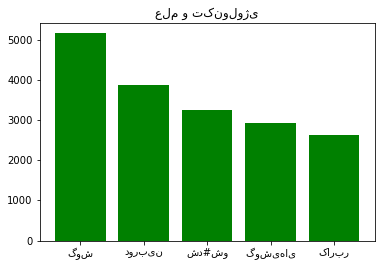

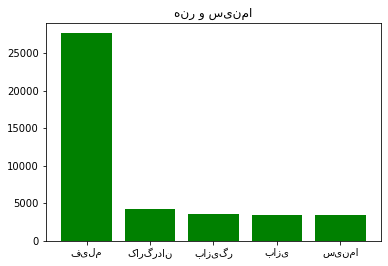

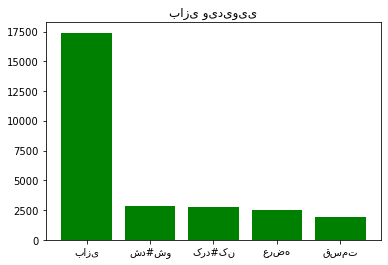

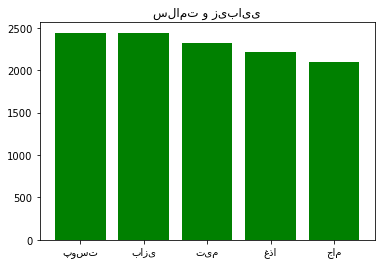

In [7]:
from matplotlib import pyplot as plt
from operator import itemgetter

labels = ['علم و تکنولوژی', 'هنر و سینما', 'بازی ویدیویی', 'سلامت و زیبایی']
count_labels = [tech_dict, art_dict, game_dict, health_dict]

for i in range(4):
    items = dict(sorted(count_labels[i].items(), key = itemgetter(1), reverse = True)[0:5])
    keys = items.keys()
    values = items.values()
    plt.bar(keys, values, color = 'green')
    plt.title(labels[i])
    plt.show()

# Third Phase: Evaluation

In [8]:
def check_corrects(df):
    df['correct'] = np.where(df['label'] == df['predict'] , 'T', 'F')

def accuracy(df):   
    count = (df['correct'] == 'T').sum()
    return count / len(df)
    
def precision(df):
    precision_lables = {}
    for l in labels:
        corr_det_class = 0
        all_det_class = 0
        for i in range(len(df["label"])):
            if df["predict"][i] == l:
                all_det_class += 1
                if df["correct"][i] == 'T':
                    corr_det_class += 1
        precision_lables[l] = corr_det_class / all_det_class
    return precision_lables

def recall(df):
    recall_lables = {}
    for l in labels:
        corr_det_class = 0
        total_class = 0
        for i in range(len(df["label"])):
            if df["predict"][i] == l and df["correct"][i] == 'T':
                corr_det_class += 1
            if df["label"][i] == l:
                total_class += 1
        recall_lables[l] = corr_det_class / total_class
    return recall_lables
    
def F1(df):
    p = precision(df)
    r = recall(df)
    f1 = {}
    for l in labels:
        f1[l] = 2 * ((p[l] * r[l]) / (p[l] + r[l]))
    return f1

In [9]:
def macro(df):
    data = F1(df)
    s = sum(data.values())
    return s / len(data)

def weighted(df):
    data = F1(df)
    s = 0
    counts = 0
    for l in labels:
        w = len(df[df['label'] == l])
        s += w * data[l]
        counts += w
    return s / counts

def micro(df):
    return accuracy(df)

In [10]:
def print_outputs(df):
    check_corrects(df)
    
    precision_dict = precision(df)
    recall_dict = recall(df)
    F1_dict = F1(df)

    print("Precision")
    print("\tScience Technology: ", round(precision_dict['علم و تکنولوژی'] * 100,2))
    print("\tArt Cinema: ", round(precision_dict['هنر و سینما'] * 100, 2))
    print("\tVideo Game: ", round(precision_dict['بازی ویدیویی'] * 100,2))
    print("\tHealth Beauty: ", round(precision_dict['سلامت و زیبایی'] *100,2))

    print("Recall")
    print("\tScience Technology: ", round(recall_dict['علم و تکنولوژی'] *100,2))
    print("\tArt Cinema: ", round(recall_dict['هنر و سینما'] * 100,2))
    print("\tVideo Game: ", round(recall_dict['بازی ویدیویی'] *100,2))
    print("\tHealth Beauty: ", round(recall_dict['سلامت و زیبایی'] *100,2))

    print("F1-Score")
    print("\tScience Technology: ", round(F1_dict['علم و تکنولوژی'] *100,2))
    print("\tArt Cinema: ", round(F1_dict['هنر و سینما'] *100,2))
    print("\tVideo Game: ", round(F1_dict['بازی ویدیویی'] *100,2))
    print("\tHealth Beauty: ", round(F1_dict['سلامت و زیبایی'] *100,2))

    print("\nAccuracy: ", round(accuracy(df) * 100, 2))
    print("Marco Avg: ", round(macro(df) * 100, 2))
    print("Micro Avg: ", round(micro(df) * 100, 2))
    print("Weighted Avg: ", round(weighted(df) * 100, 2))

### Question 10.
#### A) With Additive Smoothing

In [11]:
print_outputs(smoothing_NBC())

Precision
	Science Technology:  95.39
	Art Cinema:  94.22
	Video Game:  95.9
	Health Beauty:  98.03
Recall
	Science Technology:  97.11
	Art Cinema:  97.6
	Video Game:  94.92
	Health Beauty:  92.55
F1-Score
	Science Technology:  96.24
	Art Cinema:  95.88
	Video Game:  95.41
	Health Beauty:  95.21

Accuracy:  95.76
Marco Avg:  95.69
Micro Avg:  95.76
Weighted Avg:  95.76


#### B) Without Additive Smoothing

In [12]:
print_outputs(NBC())

Precision
	Science Technology:  36.45
	Art Cinema:  69.23
	Video Game:  95.65
	Health Beauty:  100.0
Recall
	Science Technology:  100.0
	Art Cinema:  5.39
	Video Game:  11.17
	Health Beauty:  3.73
F1-Score
	Science Technology:  53.42
	Art Cinema:  10.0
	Video Game:  20.0
	Health Beauty:  7.19

Accuracy:  39.15
Marco Avg:  22.65
Micro Avg:  39.15
Weighted Avg:  26.89


### Question 12.

In [13]:
df = smoothing_NBC()
false = df[df["label"] != df["predict"]]
idx = false.head().index.values.tolist()
for i in idx:
    print("Content: ", test_df["content"][i])
    print("Main Label: ", false["label"][i])
    print("Predicted Label: ", false["predict"][i])
    print("-------------------")
    print("-------------------")

Content:  این افزونه‌ موبایل با دقت ۹۹ درصد سرطان را تشخیص می‌دهد محققان توانسته‌اند یک طیف سنج قابل حمل برای تلفن‌های همراه هوشمند تولید کنند که می‌تواند با دقت ۹۹ درصد سرطان را تشخیص دهد و به پزشکان اجازه می‌دهد که از بیماری مریض‌شان باخبر شوند. این دستگاه با بررسی کردن نمونه بافت اینترلوکین ۶ که یکی از اینترلوکین‌های مهم بدن است و از گلبولهای سفید ترشح می‌شود و ارتباط نزدیکی با ریه، پروستات و کبد دارد، متوجه سرطان ‌می‌شود. البته باید به این موضوع اشاره کنیم که این دستگاه اولین طیف سنج قابل حملی نیست که برای موبایل طراحی شده، اما می‌تواند هشت نمونه را در یک لحظه با هم بررسی کند و این موضوع باعث می‌شود که پزشکان بدون حضور در بیمارستان هم بتوانند به بیماران خودشان کمک کنند. این دستگاه برای بیمارستان و کلینیک‌هایی که آزمایشگاه ندارند بسیار مناسب خواهد بود و به افراد اجازه می‌دهد که بتوانند به سرعت نمونه‌های مختلف را بررسی کنند. در این روش طیف سنجی که تلفن‌های همراه هوشمند از آن استفاده می‌کنند از تکنیکی با نام (ELISA) یا تست الیزا استفاده می‌کند که نوعی پادتن به حساب می‌آید و می‌تواند س